### Supervised Machine Learning, Regression -  Bikes Sales in Europe

### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### Bonus: performance improvement after removing outliers

## 1. Import Libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [3]:
# Define path

path = r'/Users/eriseldabaci/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design/Bikes Sales in Europe'

path

'/Users/eriseldabaci/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design/Bikes Sales in Europe'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepare Data', 'bike_sales.csv'),index_col=0)

## 2. Data cleaning

In [5]:
df.columns

Index(['Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender',
       'Country', 'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

In [6]:
df.head(3)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
1,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
2,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2760


In [7]:
df.shape

(112036, 17)

In [8]:
# Check for missing values

df.isnull().sum() # No missing values to handle

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

 ### - Dublicate values

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(112036,)

 ### Correlation HeatMap

In [11]:
# Create sub for to pick out variable

sub = df[['Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]

# Chek the output

sub

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,8,45,120,590,360,960
1,19,8,45,120,590,360,960
2,49,23,45,120,1366,1035,2760
3,49,20,45,120,1188,900,2400
4,47,4,45,120,238,180,480
...,...,...,...,...,...,...,...
113031,41,3,24,64,112,72,192
113032,18,22,24,64,655,528,1408
113033,18,22,24,64,655,528,1408
113034,37,24,24,64,684,576,1536


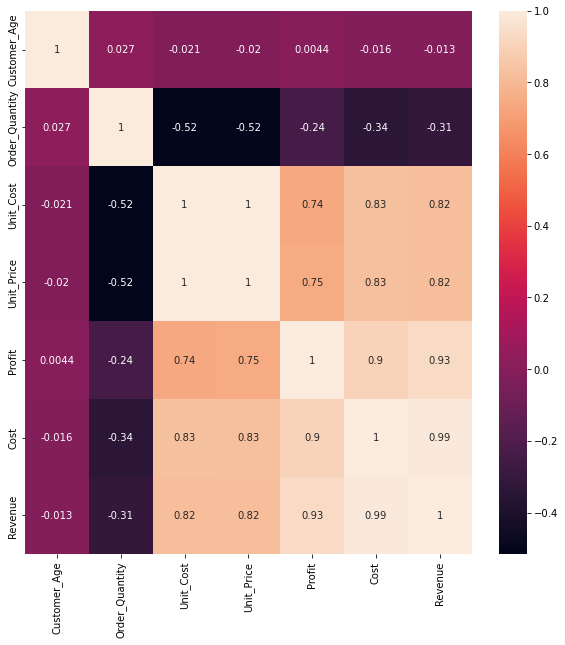

In [12]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Notes: 'Revenue' has strong relationship with 'Unit_Price', 'Unit_Cost','Profit' and 'Cost". "Cost" also have strong relationship with 'Unit_Cost','Unit_Price','Profit' and 'Revenue'. 'Profit' has strong relationship with 'Unit_Cost','Unit_Price', 'Cost" and 'Revenue'.'Order_Quantity' has a negative moderate with 'Unit_Cost' and 'Unit_Price'.

### - Extreme values checks

/Users/blandizoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit_Cost', ylabel='Density'>

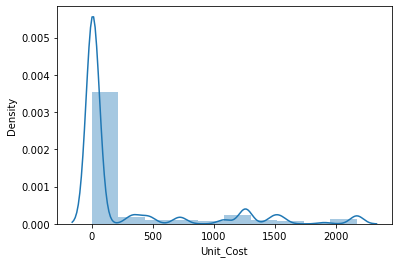

In [15]:
sns.distplot(df['Unit_Cost'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [16]:
df['Unit_Cost'].mean() # Check the mean

267.8196026277268

In [17]:
df['Unit_Cost'].median() # Check the mean

9.0

In [18]:
df['Unit_Cost'].max() # Check the mean

2171

/Users/blandizoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

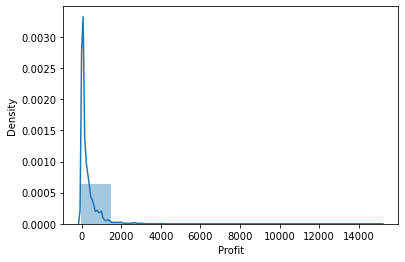

In [20]:

sns.distplot(df['Profit'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [21]:
df['Profit'].mean() # Check the mean

286.03519404477134

In [22]:
df['Profit'].median() # Check the mean

103.0

In [23]:
df['Profit'].max() # Check the mean

15096

/Users/blandizoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

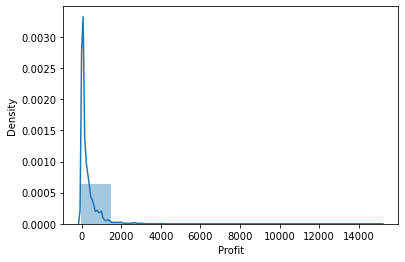

In [27]:
sns.distplot(df['Profit'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

## 3. Data prep for regression analysis 

Text(0, 0.5, 'Profit')

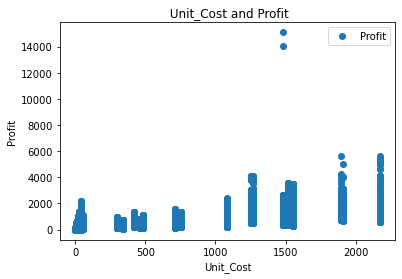

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Unit_Cost', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title(' Unit_Cost and Profit')  
plt.xlabel('Unit_Cost')  
plt.ylabel('Profit')  


In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df[['Unit_Cost']].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [31]:
# Chek the output
X

array([[45],
       [45],
       [45],
       ...,
       [24],
       [24],
       [24]])

In [32]:
# Chek the output
y

array([[ 590],
       [ 590],
       [1366],
       ...,
       [ 655],
       [ 684],
       [ 655]])

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Profit')

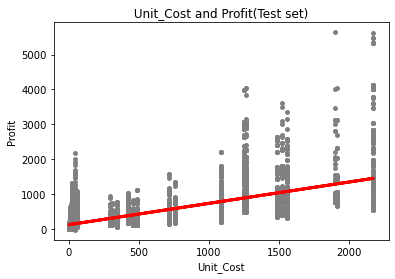

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title(' Unit_Cost and Profit(Test set) ')
plot_test.xlabel('Unit_Cost')
plot_test.ylabel('Profit')


#### Note: The re egression line doesn’t perfectly cover all of your data points. 

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.61249083]]
Mean squared error:  91070.03955524859
R2 score:  0.5621764079228362


#### Note:  R2 score:  0.5621764079228362 which means that the model explains about 56% of the variation in the data. This is not a very high value, and suggests that there may be other factors that are influencing the target variable that are not accounted for in the model. The mean squared error is quite high at 91070.03955524859, which suggests that the model may not be a good fit for the data

In [40]:
y_predicted

array([[130.27394136],
       [785.63912847],
       [124.14903307],
       ...,
       [122.92405141],
       [123.53654224],
       [127.82397804]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,346,130.273941
1,312,785.639128
2,151,124.149033
3,16,122.924051
4,473,1030.022969
5,14,122.924051
6,280,420.594594
7,873,138.236322
8,592,1030.022969
9,550,785.639128


    #### - Compare how the regression fits the training set

In [42]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.61249083]]
Mean squared error:  94407.16512898769
R2 score:  0.542607928597281


#### Note: he R2 score is 0.542607928597281, which means that the model explains about 54% of the variation in the training data. This is not a very high value, and suggests that there may be other factors that are influencing the target variable that are not accounted for in the model. Below we remove outliner and we can see the result.

Text(0, 0.5, 'Profit')

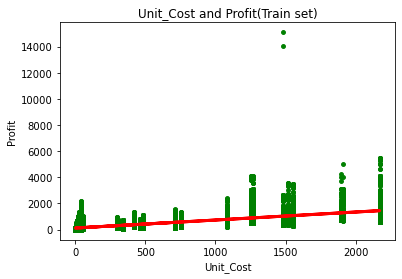

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Unit_Cost and Profit(Train set)')
plot_test.xlabel('Unit_Cost')
plot_test.ylabel('Profit')


## Bonus: performance improvement after removing outliers

In [47]:
# Clean the extreme values from the "satisfaction_rating" variable observed during the consistency checks.

Q1 = df['Unit_Cost'].quantile(0.25)
Q3 = df['Unit_Cost'].quantile(0.75)
IQR = Q3 - Q1

In [48]:
upper_bound = Q3 + 1.5*IQR

In [50]:
df_test = df[df['Unit_Cost'] <= upper_bound]

Text(0, 0.5, 'Profit')

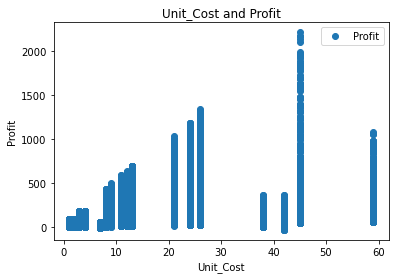

In [51]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Unit_Cost', y='Profit', style='o')  
plt.title('Unit_Cost and Profit')  
plt.xlabel('Unit_Cost')  
plt.ylabel('Profit')  

In [52]:
# Reshape again.

X_2 = df_test['Unit_Cost'].values.reshape(-1,1)
y_2 = df_test['Unit_Cost'].values.reshape(-1,1)

In [53]:
x_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [54]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [55]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [56]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.]]
Mean squared error:  6.94437675443413e-25
R2 score:  1.0


Text(0, 0.5, 'Profit')

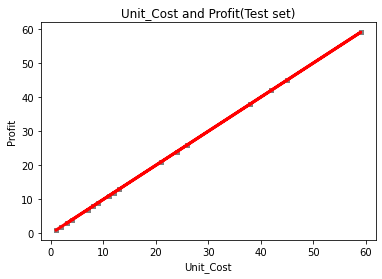

In [59]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Unit_Cost and Profit(Test set)')
plot_test.xlabel('Unit_Cost')
plot_test.ylabel('Profit')

In [60]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.0
1,2,2.0
2,2,2.0
3,1,1.0
4,13,13.0
5,1,1.0
6,13,13.0
7,3,3.0
8,2,2.0
9,1,1.0
